<a href="https://colab.research.google.com/github/irissun9602/Mouse-Dynamics/blob/main/Login_data%2BMouse_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import os
import pandas as pd

# Google Drive 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Login Data Load

In [ ]:
# 사용자 폴더 목록
user_folders = ['user0', 'user1', 'user2', 'user3', 'user4', 'user5', 'user6', 'user7', 'user8', 'user9', 'user10']  # 사용자 폴더를 필요에 따라 추가

# 모든 CSV 파일을 저장할 빈 데이터프레임 생성
df = pd.DataFrame()

# 각 사용자 폴더에 대해 CSV 파일을 읽어와서 리스트에 추가
# 각 사용자 폴더에 대해 CSV 파일을 읽어와서 리스트에 추가
for user_folder in user_folders:
    folder_path = f'/content/drive/MyDrive/Colab Notebooks/login/{user_folder}/'
    # 해당 폴더에 있는 모든 CSV 파일 목록 가져오기
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

    # 각 CSV 파일을 읽어와서 리스트에 추가
    for i, csv_file in enumerate(csv_files):
        file_path = os.path.join(folder_path, csv_file)
        cs = pd.read_csv(file_path, header=None)
        new_columns = ['index', 'Login Timestamp', 'User ID', 'IP Address', 'Country',
                       'Region', 'City', 'ASN', 'User Agent String',
                       'Browser Name and Version', 'OS Name and Version', 'Device Type',
                       'Login Successful']
        cs.columns = new_columns
        cs['y_label'] = user_folder.replace('user', '')
        cs['match'] = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]  # CSV 파일이 0부터 시작하는 인덱스에 맞게 1을 더해줍니다.
        df = pd.concat([df, cs], ignore_index=True)

# 결과 출력
print(df)

     index   Login Timestamp                User ID       IP Address Country  \
0        4  2023-12-08 15:19  airforce812@gmail.com  219.255.207.116      KR   
1       12  2023-12-08 19:54  airforce812@gmail.com  219.255.207.116      KR   
2       20  2023-12-08 23:09  airforce812@gmail.com  219.255.207.116      KR   
3       28  2023-12-09 11:41  airforce812@gmail.com   121.140.80.228      KR   
4       39  2023-12-09 18:03  airforce812@gmail.com   219.255.207.24      KR   
..     ...               ...                    ...              ...     ...   
160    179  2023-12-12 22:52             ilovepizza   125.130.224.62      KR   
161    182  2023-12-12 23:16             ilovepizza   125.130.224.62      KR   
162    182  2023-12-12 23:16             ilovepizza   125.130.224.62      KR   
163    185  2023-12-12 23:39             ilovepizza   125.130.224.62      KR   
164    185  2023-12-12 23:39             ilovepizza   125.130.224.62      KR   

                Region      City   ASN 

Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

login_data_copy = df.copy()

# 'Login Timestamp' 열을 Label Encoding
login_data_copy['Login Timestamp'] = label_encoder.fit_transform(login_data_copy['Login Timestamp'])

# 'IP Address' 열을 Label Encoding
login_data_copy['IP Address'] = label_encoder.fit_transform(login_data_copy['IP Address'])

login_data_copy['Country'] = label_encoder.fit_transform(login_data_copy['Country'])
login_data_copy['Region'] = label_encoder.fit_transform(login_data_copy['Region'])
login_data_copy['City'] = label_encoder.fit_transform(login_data_copy['City'])
login_data_copy['User Agent String'] = label_encoder.fit_transform(login_data_copy['User Agent String'])
login_data_copy['Browser Name and Version'] = label_encoder.fit_transform(login_data_copy['Browser Name and Version'])
login_data_copy['OS Name and Version'] = label_encoder.fit_transform(login_data_copy['OS Name and Version'])
login_data_copy['Device Type'] = label_encoder.fit_transform(login_data_copy['Device Type'])


In [ ]:
di = {'airforce812@gmail.com':0, 'dge06177': 1, 'eunseo': 2, 'ssun': 3, 'tjwjddbs': 4, 'dd': 5, 'dmsgp1858' : 6, 'shnchn' : 7, 'nhy' : 8, 'kamgirl' : 9, 'ilovepizza' : 10}
login_data_copy["User ID"].replace(di, inplace=True)
login_data_copy['User ID']
# print(df.describe())

0       0
1       0
2       0
3       0
4       0
       ..
160    10
161    10
162    10
163    10
164    10
Name: User ID, Length: 165, dtype: int64

In [ ]:
login_data_copy

,index,Login Timestamp,User ID,IP Address,Country,Region,City,ASN,User Agent String,Browser Name and Version,OS Name and Version,Device Type,Login Successful,y_label,match
0,4,3,0,20,0,2,3,9318,4,1,2,1,True,0,1
1,12,10,0,20,0,2,3,9318,4,1,2,1,True,0,2
2,20,17,0,20,0,2,3,9318,4,1,2,1,False,0,3
3,28,21,0,5,0,1,2,4766,4,1,2,1,False,0,4
4,39,29,0,21,0,2,3,9318,6,3,2,1,True,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,179,144,10,6,0,1,2,4766,5,3,2,1,True,10,11
161,182,147,10,6,0,1,2,4766,5,3,2,1,True,10,12
162,182,147,10,6,0,1,2,4766,5,3,2,1,True,10,13
163,185,150,10,6,0,1,2,4766,5,3,2,1,True,10,14


1-2. Mouse motion data Load

In [ ]:
# 사용자 폴더 목록
user_folders = ['user0', 'user1', 'user2', 'user3', 'user4', 'user5', 'user6', 'user7', 'user8', 'user9', 'user10']  # 사용자 폴더를 필요에 따라 추가

# 모든 CSV 파일을 저장할 빈 데이터프레임 생성
mouse = pd.DataFrame()
repeats = 0

# 각 사용자 폴더에 대해 CSV 파일을 읽어와서 리스트에 추가
for user_folder in user_folders:
    folder_path = f'/content/drive/MyDrive/Colab Notebooks/Mouse-Dynamics-Challenge-master/Mouse-Dynamics-Challenge-master/training_files/{user_folder}/'

    # 해당 폴더에 있는 모든 CSV 파일 목록 가져오기
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

    # 각 CSV 파일을 읽어와서 리스트에 추가
    for i, csv_file in enumerate(csv_files):
        file_path = os.path.join(folder_path, csv_file)
        cs = pd.read_csv(file_path)
        new_columns = ['record timestamp', 'client timestamp', 'button', 'state', 'x', 'y']
        cs.columns = new_columns
        cs['y_label'] = user_folder.replace('user', '')
        cs['match'] = i + 1

        mouse = pd.concat([mouse, cs], ignore_index=True)

# 결과 출력
print(mouse)

         record timestamp  client timestamp       button             state  \
0                    1.29              1.29  Button.left          Released   
1                    1.34              1.34          NaN              move   
2                    1.34              1.34          NaN              move   
3                    1.36              1.36          NaN              move   
4                    1.36              1.36          NaN              move   
...                   ...               ...          ...               ...   
4597334            598.35            598.35       Scroll  Scrolled (0, -1)   
4597335            598.36            598.36          NaN              move   
4597336            598.37            598.37       Scroll  Scrolled (0, -1)   
4597337            598.38            598.38       Scroll  Scrolled (0, -1)   
4597338            598.39            598.39       Scroll  Scrolled (0, -1)   

            x    y y_label  match  
0         121  154       0 

1-3. Concatnate datasets

In [ ]:
# y_label과 match 칼럼을 동시에 Outer Join 키 값으로 사용하여 매칭하기
merged_df = pd.merge(mouse,login_data_copy, left_on=['y_label', 'match'], right_on=['y_label', 'match'], how='outer')

print(merged_df)

         record timestamp  client timestamp       button             state  \
0                    1.29              1.29  Button.left          Released   
1                    1.34              1.34          NaN              move   
2                    1.34              1.34          NaN              move   
3                    1.36              1.36          NaN              move   
4                    1.36              1.36          NaN              move   
...                   ...               ...          ...               ...   
4597334            598.35            598.35       Scroll  Scrolled (0, -1)   
4597335            598.36            598.36          NaN              move   
4597336            598.37            598.37       Scroll  Scrolled (0, -1)   
4597337            598.38            598.38       Scroll  Scrolled (0, -1)   
4597338            598.39            598.39       Scroll  Scrolled (0, -1)   

            x    y y_label  match  index  Login Timestamp  ... 

In [ ]:
all_data = merged_df

2-1. Mouse Data Pre-Processing

In [ ]:
all_data["button"].fillna(0, inplace=True)

In [ ]:
di = {'NoButton': 0, 'Left': 1, 'Right': 2, 'Button.left': 1, 'Button.right': 2, 'Button.middle': 3, 'Scroll' : 4, 'Button.x1' :5, 'Button.x2' :6}
dj = {'Move': 0, 'move' : 0, 'Pressed': 1, 'Released' : 2, 'Drag' : 3, 'Up' : 4, 'Down' : 5, 'Scrolled (0, 1)' : 6, 'Scrolled (0, -1)' : 7, 'Clicked' :1, 'Scrolled (0, -2)' : 8, 'Scrolled (0, 2)' : 9, 'Scrolled (0, 0)' :10, 'Scrolled (-1, 0)' :11, 'Scrolled (0, -4)' : 12, 'Scrolled (0, 4)' : 13, 'Scrolled (1, 0)' :14, 'Scrolled (0, -3)' :15, 'Scrolled (0, 3)':16, 'Scrolled (0, -6)' : 17, 'Scrolled (0, -5)' : 18, 'Scrolled (0, 8)': 19, 'Scrolled (0, 5)':20, 'Scrolled (0, 7)':21, 'Scrolled (0, 10)':22, 'Scrolled (0, 6)' :23
      , 'Scrolled (0, 9)' : 23, 'Scrolled (2, 0)' : 24, 'Scrolled (3, 0)' : 24, 'Scrolled (4, 0)' : 24, 'Scrolled (5, 0)' : 24, 'Scrolled (0, -8)' : 25, 'Scrolled (0, -10)' : 26, 'Scrolled (0, -7)': 27}
all_data["button"].replace(di, inplace=True)
all_data["state"].replace(dj, inplace=True)
print(all_data.head(10))
# print(df.describe())

   record timestamp  client timestamp  button  state    x    y y_label  match  \
0              1.29              1.29       1      2  121  154       0      1   
1              1.34              1.34       0      0  134  160       0      1   
2              1.34              1.34       0      0  158  167       0      1   
3              1.36              1.36       0      0  180  177       0      1   
4              1.36              1.36       0      0  201  184       0      1   
5              1.37              1.37       0      0  220  191       0      1   
6              1.37              1.37       0      0  235  197       0      1   
7              1.39              1.39       0      0  250  204       0      1   
8              1.39              1.39       0      0  261  208       0      1   
9              1.40              1.40       0      0  270  212       0      1   

   index  Login Timestamp  ...     ASN  User Agent String  \
0    4.0              3.0  ...  9318.0         

In [ ]:
# y_label을 기준으로 그룹화하여 사용자별로 계산 수행
grouped = all_data.groupby('y_label')

# 새로운 열에 데이터 추가
for user_id, group_data in grouped:
    all_data.loc[group_data.index, 'delta_client_time'] = group_data["client timestamp"].diff(-1).abs()
    all_data.loc[group_data.index, 'delta_x'] = group_data["x"].diff(-1)
    all_data.loc[group_data.index, 'delta_y'] = group_data["y"].diff(-1)
    all_data.loc[group_data.index, 'delta_dist'] = np.sqrt((group_data["delta_x"])**2 + (group_data["delta_y"])**2)
    all_data.loc[group_data.index, 'mouse_speed'] = np.where(group_data["delta_client_time"] != 0, group_data["delta_dist"] / group_data["delta_client_time"], np.nan)
    all_data.loc[group_data.index, 'mouse_speed'] = all_data['mouse_speed'].abs()
    all_data.loc[group_data.index, 'slope'] = np.where(group_data["delta_x"] != 0, group_data["delta_y"] / group_data["delta_x"], np.nan)
    all_data.loc[group_data.index, 'delta_slope'] = group_data["slope"].diff(-1)
    all_data.loc[group_data.index, 'curvature'] = np.where(group_data["delta_x"] != 0, group_data["delta_slope"] / group_data["delta_x"], np.nan)
    all_data.loc[group_data.index, 'curvature'] = all_data['curvature'].abs()


In [ ]:
grouped = all_data.groupby('y_label')

for user_id, group_data in grouped:
    clicks_so_far = []
    for index, row in group_data.iterrows():
        if index != group_data.index[0]:
            clicks_so_far.append(clicks_so_far[-1] + (1 if row["button"] != 0 else 0))
        else:
            clicks_so_far.append(1 if row["button"] != 0 else 0)

    group_data['clicks_so_far'] = clicks_so_far
    group_data['click_frequency'] = group_data['clicks_so_far'] / group_data['client timestamp'].replace(0, 1)

    # inf 값을 0으로 처리
    group_data['click_frequency'] = group_data['click_frequency'].replace([np.inf, -np.inf], 0)

    # 변경된 데이터를 원본 DataFrame에 병합
    all_data.loc[group_data.index, 'clicks_so_far'] = group_data['clicks_so_far']
    all_data.loc[group_data.index, 'click_frequency'] = group_data['click_frequency']


In [ ]:
X = all_data.fillna(0, inplace=True)


3. Random Forest Claasification

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
X = all_data.drop(['y_label', 'User ID', 'index','IP Address', 'Login Successful', 'match'], axis=1)  # Assuming 'session_id' is not a feature
# One-hot encode categorical columns
y = all_data['y_label'].astype(int)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# 데이터 스케일링
scaler = StandardScaler()
Scaled_X = scaler.fit_transform(X)


In [ ]:
X

,record timestamp,client timestamp,button,state,x,y,match,Login Timestamp,Country,Region,...,delta_client_time,delta_x,delta_y,delta_dist,mouse_speed,slope,clicks_so_far,click_frequency,delta_slope,curvature
0,1.29,1.29,1,2,121,154,1,3.0,0.0,2.0,...,0.05,-13.0,-6.0,14.317821,286.356421,0.461538,1.0,0.775194,0.169872,0.013067
1,1.34,1.34,0,0,134,160,1,3.0,0.0,2.0,...,0.00,-24.0,-7.0,25.000000,0.000000,0.291667,1.0,0.746269,-0.162879,0.006787
2,1.34,1.34,0,0,158,167,1,3.0,0.0,2.0,...,0.02,-22.0,-10.0,24.166092,1208.304597,0.454545,1.0,0.746269,0.121212,0.005510
3,1.36,1.36,0,0,180,177,1,3.0,0.0,2.0,...,0.00,-21.0,-7.0,22.135944,0.000000,0.333333,1.0,0.735294,-0.035088,0.001671
4,1.36,1.36,0,0,201,184,1,3.0,0.0,2.0,...,0.01,-19.0,-7.0,20.248457,2024.845673,0.368421,1.0,0.735294,-0.031579,0.001662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4597334,598.35,598.35,4,7,1645,646,15,150.0,0.0,1.0,...,0.01,1.0,0.0,0.000000,0.000000,0.000000,16059.0,26.838807,0.000000,0.000000
4597335,598.36,598.36,0,0,1644,646,15,150.0,0.0,1.0,...,0.01,0.0,0.0,0.000000,0.000000,0.000000,16059.0,26.838358,0.000000,0.000000
4597336,598.37,598.37,4,7,1644,646,15,150.0,0.0,1.0,...,0.01,0.0,0.0,0.000000,0.000000,0.000000,16060.0,26.839581,0.000000,0.000000
4597337,598.38,598.38,4,7,1644,646,15,150.0,0.0,1.0,...,0.01,0.0,0.0,0.000000,0.000000,0.000000,16061.0,26.840804,0.000000,0.000000


In [ ]:
from xgboost import XGBClassifier  # XGBoostClassifier import

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoostClassifier 모델 생성 및 훈련
xgb_model = XGBClassifier(random_state=42)  # XGBoostClassifier로 변경
xgb_model.fit(X_train, y_train)

# 테스트 세트로 예측
y_pred = xgb_model.predict(X_test)

# 모델 성능 평가
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# 결과 출력
print(f"Accuracy: {accuracy}")
print("\nClassification Report:")
print(report)


Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35263
           1       1.00      1.00      1.00    144400
           2       1.00      1.00      1.00    195666
           3       1.00      1.00      1.00    148184
           4       1.00      1.00      1.00    136077
           5       1.00      1.00      1.00     42096
           6       1.00      1.00      1.00     85627
           7       1.00      1.00      1.00     13315
           8       1.00      1.00      1.00     47538
           9       1.00      1.00      1.00     39730
          10       1.00      1.00      1.00     31572

    accuracy                           1.00    919468
   macro avg       1.00      1.00      1.00    919468
weighted avg       1.00      1.00      1.00    919468



In [ ]:
import matplotlib.pyplot as plt

# 칼럼 중요도 시각화
xgb.plot_importance(model)
plt.show()

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

# Create a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Display classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.9999959603969749
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    123090
           1       1.00      1.00      1.00    508135
           2       1.00      1.00      1.00    685005
           3       1.00      1.00      1.00    518508
           4       1.00      1.00      1.00    476705
           5       1.00      1.00      1.00    146148
           6       1.00      1.00      1.00    299839
           7       1.00      1.00      1.00     46327
           8       1.00      1.00      1.00    166136
           9       1.00      1.00      1.00    138646
          10       1.00      1.00      1.00    109599

    accuracy                           1.00   3218138
   macro avg       1.00      1.00      1.00   3218138
weighted avg       1.00      1.00      1.00   3218138



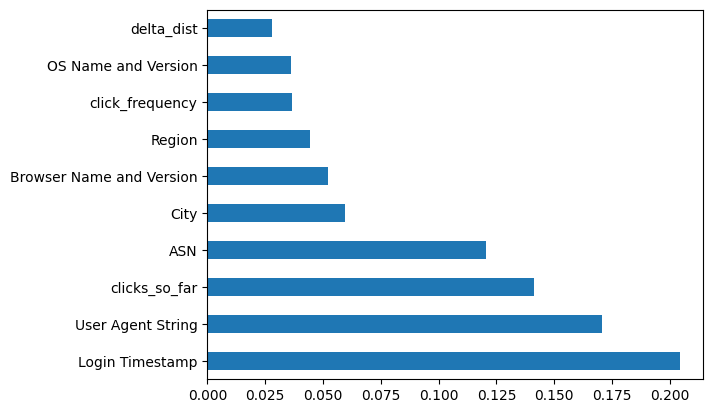

In [ ]:
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
X

,Serial_no,record timestamp,client timestamp,button,state,x,y,Login Timestamp,IP Address,Country,...,delta_client_time,delta_x,delta_y,delta_dist,mouse_speed,slope,delta_slope,curvature,clicks_so_far,click_frequency
4109016,223,0.101,0.016,0,0.0,546.0,602.0,10,5,1,...,7.300001e-12,290.0,198.0,351.146693,4.810228e+13,0.682759,-0.817241,0.002818,0,0.000000
3408490,235,0.127,0.016,0,0.0,258.0,407.0,19,5,1,...,5.820000e-11,-168.0,-27.0,170.155811,2.923639e+12,0.160714,0.038134,0.000227,0,0.000000
3022817,269,0.123,0.016,0,0.0,621.0,238.0,6,1,0,...,2.328000e-10,233.0,-9.0,233.173755,1.001605e+12,-0.038627,-0.913627,0.003921,0,0.000000
3750347,375,0.104,0.031,0,0.0,288.0,424.0,22,5,1,...,9.999997e-04,152.0,87.0,175.137089,1.751371e+05,0.572368,0.248230,0.001633,0,0.000000
473602,527,0.160,0.047,0,0.0,392.0,248.0,7,1,0,...,1.500000e-02,-13.0,-165.0,165.511329,1.103409e+04,12.692308,13.146853,1.011296,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6937679,7079822,16952.914,16953.003,0,0.0,851.0,955.0,18,4,2,...,9.300000e-02,14.0,8.0,16.124515,1.733819e+02,0.571429,0.571429,0.040816,575584,33.951743
6941117,7083257,17945.674,17945.653,0,0.0,562.0,421.0,0,6,3,...,1.250000e-01,206.0,18.0,206.784912,1.654279e+03,0.087379,-0.014071,0.000068,575814,32.086545
6951006,7093147,18612.664,18612.760,0,0.0,369.0,369.0,21,6,3,...,1.090000e-01,34.0,-96.0,101.843016,9.343396e+02,-2.823529,1.476471,0.043426,577329,31.017915
6954595,7096737,18772.470,18772.567,0,0.0,657.0,377.0,20,0,2,...,1.100000e-01,-3.0,23.0,23.194827,2.108621e+02,-7.666667,-9.666667,3.222222,577819,30.779967


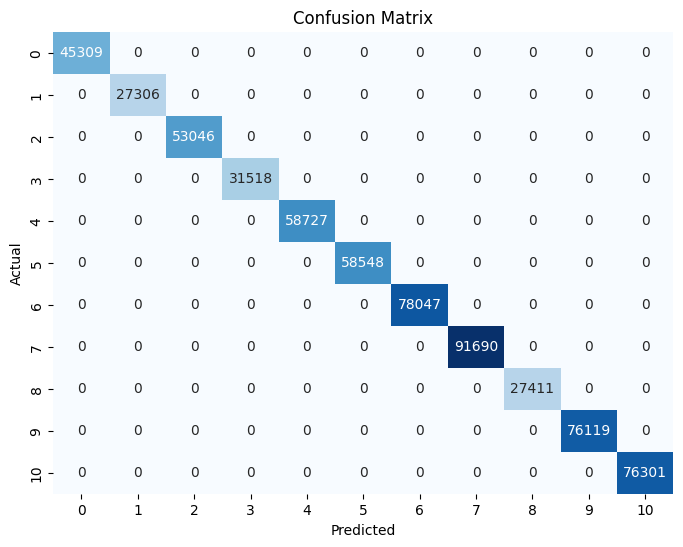

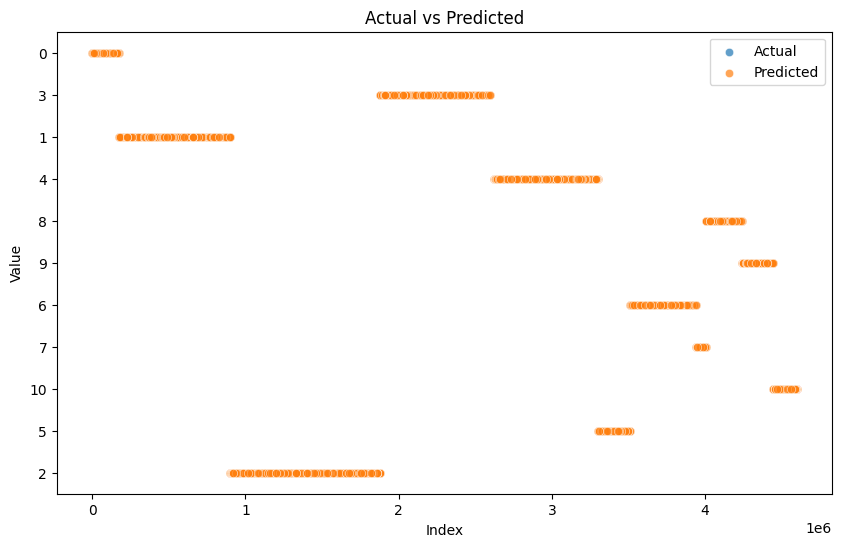

In [ ]:
import seaborn as sns

# 실제 값과 예측 값을 데이터프레임으로 변환
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Confusion Matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 실제 값과 예측 값 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x=result_df.index, y='Actual', data=result_df, label='Actual', alpha=0.7)
sns.scatterplot(x=result_df.index, y='Predicted', data=result_df, label='Predicted', alpha=0.7)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

4. McNemar Test

In [ ]:
import pandas as pd

# 예측값과 실제값을 비교하여 새로운 칼럼 추가
results = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
results['Success'] = results.apply(lambda row: 1 if row['y_test'] == row['y_pred'] else 0, axis=1)

# 결과 확인
print(results)


        y_test y_pred  Success
159463       0      0        1
2578238      3      3        1
294952       1      1        1
2960591      4      4        1
4040698      8      8        1
...        ...    ...      ...
4559974     10     10        1
660787       1      1        1
2826334      4      4        1
3947574      7      7        1
2890652      4      4        1

[624022 rows x 3 columns]


In [ ]:
import pickle
# 변수를 불러오기
with open('/content/drive/My Drive/your_file.pkl', 'rb') as f:
    login = pickle.load(f)

In [ ]:
login

,y_test,Success
0,0,0.0
1,1,0.0
2,2,1.0
3,3,1.0
4,4,0.0
5,5,1.0
6,6,1.0
7,7,1.0
8,8,0.0
9,9,1.0


In [ ]:
import pandas as pd
from scipy.stats import chi2

# 예측 결과
y_pred1 = login['Success'].T
y_pred2 = [1, 1, 1, 1, 1, 1 ,1, 1, 1, 1, 1]

# McNemar 검증을 위한 변수 초기화
a, b, c, d = 0, 0, 0, 0

# McNemar 검증 수행
for pred1, pred2 in zip(y_pred1, y_pred2):
    if pred1 == pred2:
        if pred1 == 0:
            a += 1
        else:
            d += 1
    else:
        if pred1 == 0:
            b += 1
        else:
            c += 1

# McNemar 검증 통계량 계산
X2 = ((abs(b - c) - 1) ** 2) / (b + c)
df = 1
p_value = chi2.sf(X2, df)

# 결과를 데이터프레임으로 정리
results = {
    '': ['모델 1 성공', '모델 1 실패'],
    '모델 2 성공': [d, b],
    '모델 2 실패': [c, a]
}

df_results = pd.DataFrame(results)

# McNemar 검증 통계량 및 p-value 추가
df_results['McNemar 검증 통계량'] = [X2, '']
df_results['p-value'] = [p_value, '']

# 결과 출력
print(df_results)


            모델 2 성공  모델 2 실패 McNemar 검증 통계량   p-value
0  모델 1 성공        7        0           2.25  0.133614
1  모델 1 실패        4        0                         


In [ ]:
y_pred1

0     0.0
1     0.0
2     1.0
3     1.0
4     0.0
5     1.0
6     1.0
7     1.0
8     0.0
9     1.0
10    1.0
Name: Success, dtype: float64

In [ ]:
# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 생성 및 훈련
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 테스트 세트로 예측
y_pred = rf_model.predict(X_test)

# 모델 성능 평가
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
# 결과 출력
print(f"Accuracy: {accuracy}")
print("\nClassification Report:")
print(report)

In [ ]:
y

0      267
2      466
4       83
5      200
7      350
      ... 
363    440
367     34
368     55
371     77
375    562
Name: User ID, Length: 135, dtype: int64

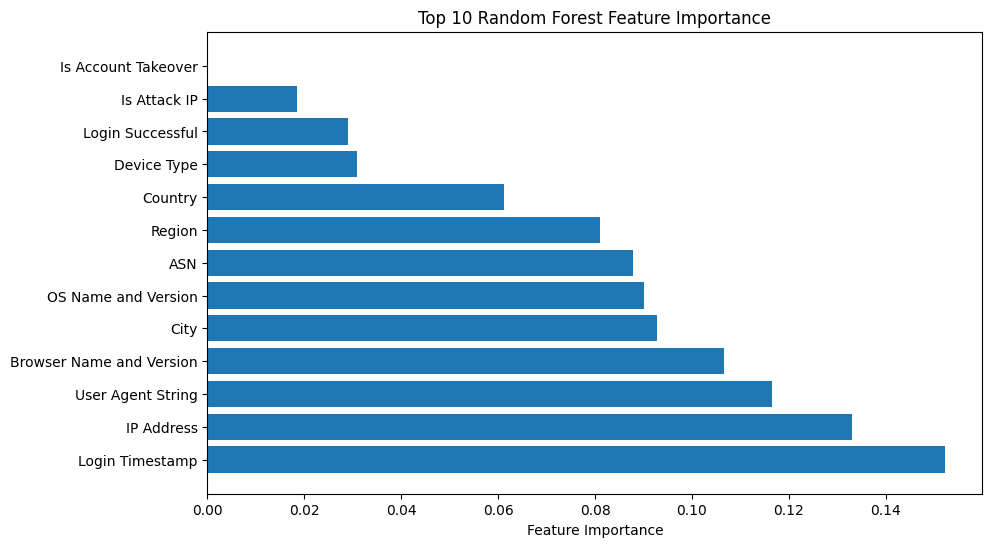

In [ ]:

# 특성 중요도 얻기
feature_importances = rf_model.feature_importances_

# 특성 중요도를 데이터프레임으로 변환
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# 중요도 순으로 정렬
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 상위 10개의 중요한 특성만 선택
top_10_features = feature_importance_df.head(10)

# 중요도를 막대 그래프로 시각화
plt.figure(figsize=(10, 6))
plt.barh(top_1000_features['Feature'], top_1000_features['Importance'])
plt.xlabel('Feature Importance')
plt.title('Top 10 Random Forest Feature Importance')
plt.show()

In [ ]:
X.describe()

,Login Timestamp,IP Address,Country,Region,City,ASN,User Agent String,Browser Name and Version,OS Name and Version,Device Type
count,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,67.000000,66.155556,7.844444,8.748148,17.385185,150648.325926,52.511111,20.474074,14.185185,0.792593
std,39.115214,38.671959,2.949492,9.201491,18.885351,162463.184310,29.116305,14.015892,7.196792,0.474677
min,0.000000,0.000000,0.000000,0.000000,0.000000,3280.000000,0.000000,0.000000,0.000000,0.000000
25%,33.500000,32.500000,7.000000,0.000000,0.000000,29695.000000,29.000000,6.500000,10.000000,1.000000
50%,67.000000,66.000000,7.000000,6.000000,9.000000,49528.000000,51.000000,19.000000,16.000000,1.000000
75%,100.500000,99.500000,9.000000,16.000000,33.000000,267862.000000,82.500000,29.000000,18.000000,1.000000
max,134.000000,132.000000,12.000000,25.000000,53.000000,500194.000000,98.000000,46.000000,26.000000,2.000000


In [ ]:
print(top_10_features)

                    Feature  Importance
0           Login Timestamp    0.152317
1                IP Address    0.133031
6         User Agent String    0.116623
7  Browser Name and Version    0.106719
4                      City    0.092767
8       OS Name and Version    0.090144
5                       ASN    0.087846
3                    Region    0.080996
2                   Country    0.061188
9               Device Type    0.030920


2. mouse 데이터 합쳤을 때

In [ ]:
file_path2 = f'/content/drive/MyDrive/Colab Notebooks/mouse_data.xlsx'

mouse_data = pd.read_excel(file_path2)

In [ ]:
all_data = pd.concat([login_data, mouse_data], axis=1)

In [ ]:
login_data

,index,Login Timestamp,User ID,Round-Trip Time [ms],IP Address,Country,Region,City,ASN,User Agent String,Browser Name and Version,OS Name and Version,Device Type,Login Successful,Is Attack IP,Is Account Takeover
0,482071,23,2670000000000000000,NaN,29,7,1,7,29695,46,19,18,1,True,False,False
2,482073,24,4660000000000000000,NaN,80,3,0,0,43646,88,2,13,0,True,False,False
4,482075,25,-8310000000000000000,NaN,5,4,3,8,29550,92,31,13,0,True,False,False
5,482076,26,2000000000000000000,NaN,119,4,0,0,29550,29,2,10,0,True,False,False
7,482078,27,3500000000000000000,NaN,17,1,10,50,500194,63,33,18,1,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,482434,18,4400000000000000000,NaN,3,9,0,0,201637,43,13,18,1,False,False,False
367,482438,19,-3440000000000000000,NaN,65,2,15,40,27887,20,2,16,2,True,False,False
368,482439,20,-5550000000000000000,NaN,27,7,4,42,29492,86,43,1,1,True,False,False
371,482442,21,-774000000000000000,NaN,26,7,4,16,29492,31,7,10,0,True,False,False


In [ ]:
prefixes = ['Login_onehot', 'Location_onehot', 'Platform_onehot']
values_without_prefix = []

for index, row in top_1000_features.iterrows():
    prefix_found = False
    for val in row.values:
        for prefix in prefixes:
            if str(val).startswith(prefix):
                prefix_found = True
                break
        if not prefix_found:
            values_without_prefix.append(val)

print(values_without_prefix)


['Unnamed: 0', 0.02431128622361696, 'ASN', 0.02344913350786997, 'record timestamp', 0.023418475848830035, 'client timestamp', 0.021059366562192348, 'x', 0.019233060347133644, 'y', 0.015564574541589828, 'Login Successful', 0.007280405446244972, 'Round-Trip Time [ms]', 0.0002912755921318505]


In [ ]:
prefixes = ['Login_onehot', 'Location_onehot', 'Platform_onehot']
prefix_counts = {}

for prefix in prefixes:
    prefix_count = 0
    for index, row in top_200_features.iterrows():
        # 각 행에서 prefix 등장 횟수 카운트
        count = sum(str(val).startswith(prefix) for val in row)
        prefix_count += count

    prefix_counts[prefix] = prefix_count

print(prefix_counts)


{'Login_onehot': 77, 'Location_onehot': 33, 'Platform_onehot': 83}


In [ ]:
prefixes = ['Login_onehot', 'Location_onehot', 'Platform_onehot']
prefix_counts = {}

for prefix in prefixes:
    prefix_count = 0
    for index, row in top_1000_features.iterrows():
        # 각 행에서 prefix 등장 횟수 카운트
        count = sum(str(val).startswith(prefix) for val in row)
        prefix_count += count

    prefix_counts[prefix] = prefix_count

print(prefix_counts)


{'Login_onehot': 536, 'Location_onehot': 123, 'Platform_onehot': 333}


In [ ]:
prefixes = ['Login_onehot', 'Location_onehot', 'Platform_onehot']
prefix_count = {}

for prefix in prefixes:
    count = sum(col.startswith(prefix) for col in X.columns)
    prefix_count[prefix] = count

    # 만약 prefix 뒤에 오는 모든 문구를 *로 포함하여 카운트하려면 아래와 같이 수정합니다.
    all_count = sum(col.startswith(prefix) for col in X.columns)
    prefix_count[prefix] = all_count

print(prefix_count)


{'Login_onehot': 658, 'Location_onehot': 187, 'Platform_onehot': 346}


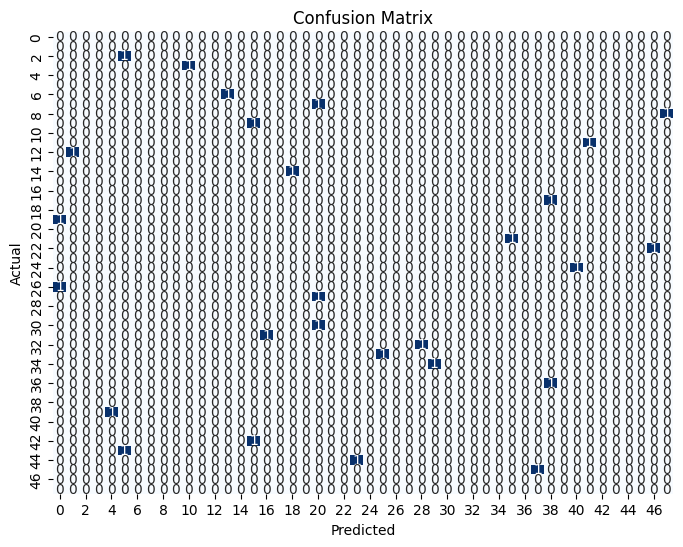

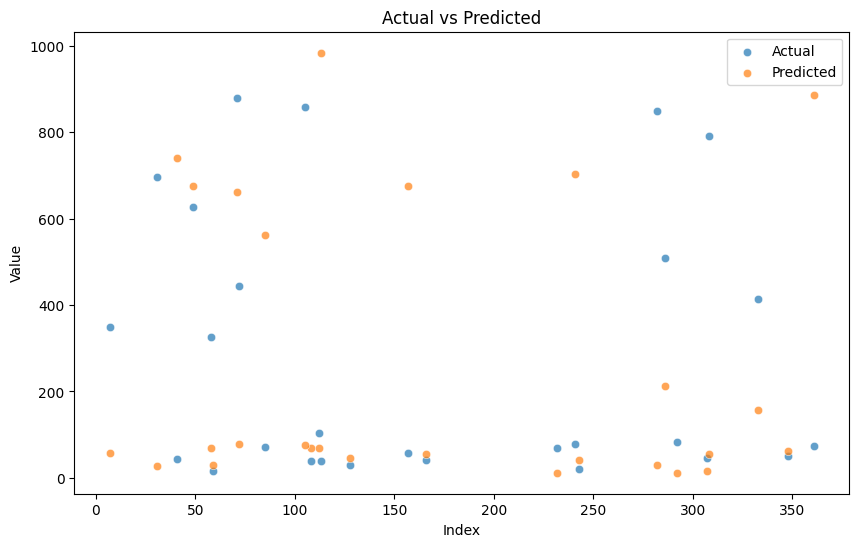

In [ ]:
import seaborn as sns

# 실제 값과 예측 값을 데이터프레임으로 변환
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Confusion Matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 실제 값과 예측 값 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x=result_df.index, y='Actual', data=result_df, label='Actual', alpha=0.7)
sns.scatterplot(x=result_df.index, y='Predicted', data=result_df, label='Predicted', alpha=0.7)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

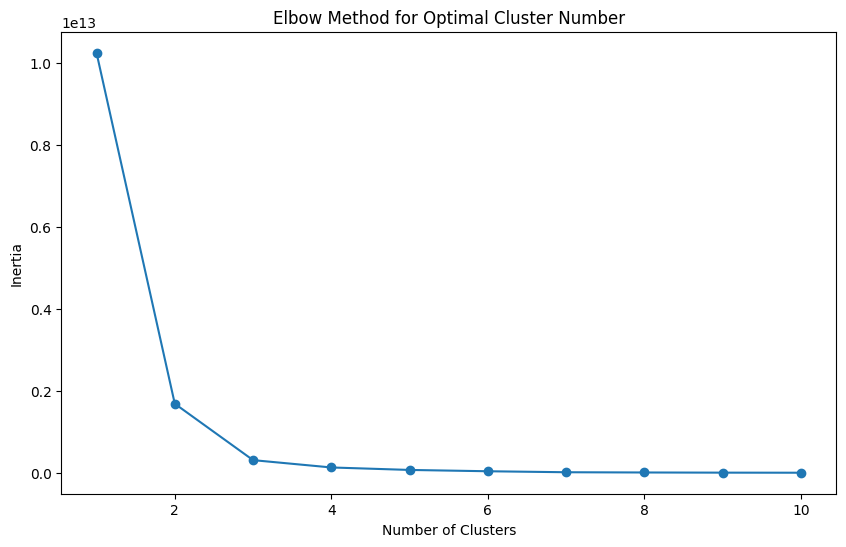

In [ ]:
# Elbow Method를 사용하여 적절한 클러스터 개수 찾기
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Elbow 그래프 출력
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Cluster Number')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


ValueError: ignored

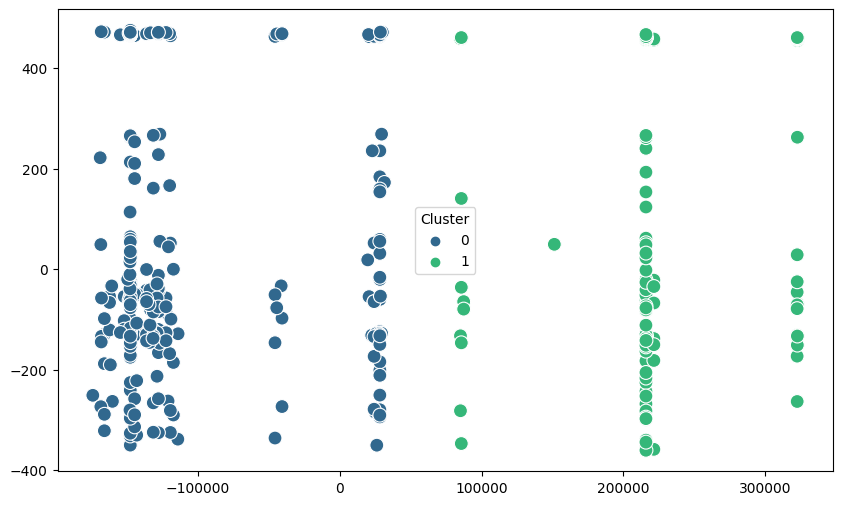

In [ ]:
# PCA를 사용하여 데이터 차원 축소 (2차원으로 설정)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# K-Means 클러스터링
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
merged_data['Cluster'] = kmeans.fit_predict(X_pca)

# 시각화
plt.figure(figsize=(10, 6))

# 산점도 그리기
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue='Cluster', data=merged_data, palette='viridis', s=100)

# 중심점 표시
centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], marker='X', s=200, color='red', label='Centroids')

plt.title('K-Means Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()